In [4]:
%config Completer.use_jedi = False

In [169]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import cluster
import pandas as pd
import json
import flask
from contrastive import CPCA
import seaborn as sns

In [6]:
painting_urls = json.load(open('painting_image_urls.json', 'r'))
episodes      = json.load(open('episode_names.json', 'r'))
attributes    = json.load(open('attribute_names.json', 'r'))
data = np.load('painting_attributes.npy')

### PCA usando SVD

In [7]:
data_centered = data.copy() 
data_centered -= np.mean(data_centered, axis=0) 
U, s, VT = np.linalg.svd(data_centered)
pca_components = VT[:2,:].astype(float)

In [136]:
C = np.cov(data_centered.T)
w,v = np.linalg.eig(C)
pc = v[:,0:2]

In [156]:
# pc.T @ data_centered[:,:]
proj_data = []
for row in data_centered:
    proj_data.append(pc.T @ row)
proj_data = np.array(proj_data).copy()

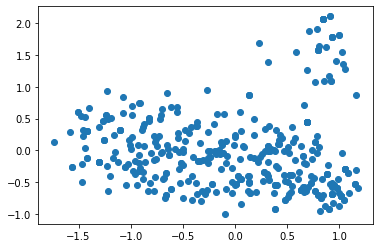

In [163]:
plt.plot(-proj_data[:,0],-proj_data[:,1],'o')

In [8]:
x_loadings = dict(zip(attributes,pca_components[0]))
y_loadings = dict(zip(attributes,pca_components[1]))

In [9]:
json.dumps([x_loadings,y_loadings])
# myDict = {'a':['apple', 'avacado'], 'b':['banana', 'berry'], 'vitamins':2.0142}
# jsonStr = json.dumps(myDict)

'[{"WAVES": -0.11347579956054688, "OCEAN": -0.11975689232349396, "WATERFALL": -0.03304067254066467, "SUN": -0.07227188348770142, "PATH": -0.0746561735868454, "WINTER": 0.1348591297864914, "CABIN": 0.04950005188584328, "SNOW": 0.13303309679031372, "ROCKS": -0.1304750144481659, "CUMULUS": 0.08827707916498184, "SNOWY_MOUNTAIN": 0.439628928899765, "BUSHES": 0.15261365473270416, "RIVER": -0.10935908555984497, "GRASS": -0.09646011888980865, "LAKE": 0.2782639265060425, "MOUNTAIN": 0.5058717131614685, "CLOUDS": 0.1214413046836853, "CONIFER": 0.48212793469429016, "DECIDUOUS": -0.2509753108024597, "TREE": 0.12803123891353607}, {"WAVES": -0.31462517380714417, "OCEAN": -0.32782015204429626, "WATERFALL": 0.060872260481119156, "SUN": -0.04614000767469406, "PATH": 0.06328986585140228, "WINTER": 0.04509163647890091, "CABIN": 0.08909925818443298, "SNOW": 0.04129979386925697, "ROCKS": -0.1933104395866394, "CUMULUS": -0.2883758246898651, "SNOWY_MOUNTAIN": -0.003002157201990485, "BUSHES": 0.15087215602397

### K-Means

In [164]:
kmeans = cluster.KMeans(6)
kmeans.fit(proj_data)

KMeans(n_clusters=6)

In [181]:
df = pd.DataFrame(data,columns=attributes)
df["id"] = df.index
df['label'] = kmeans.labels_
df = df.melt(id_vars=['id','label']).sort_values(by='id')

In [182]:
proj = pd.DataFrame(proj_data,columns=['x','y'])
proj['label'] = kmeans.labels_

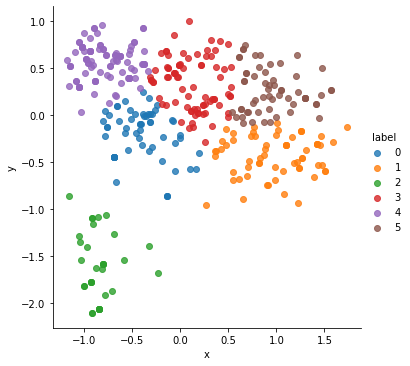

In [184]:
sns.lmplot(x='x',y='y', data=proj, hue='label', fit_reg=False)

In [166]:
# df.to_json(orient='records')
t = df.to_dict(orient='records')